# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 26)


import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

import joblib


In [2]:
df=pd.read_csv('kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# ***Data Cleaning***

In [5]:
df.drop('id',axis=1,inplace=True)

**Changing the name of the columns for easy understanding of the features**

In [6]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
#Converting to numeric form
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [9]:
#storing columns name 
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [10]:
#printing all the unique values
for col in cat_col:
    print(col, df[col].unique())

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
peda_edema ['no' 'yes' nan]
aanemia ['no' 'yes' nan]
class ['ckd' 'ckd\t' 'notckd']


In [11]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
#converting to 0 and 1
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [13]:
df['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

# ***Exploratory Data Analysis*** 

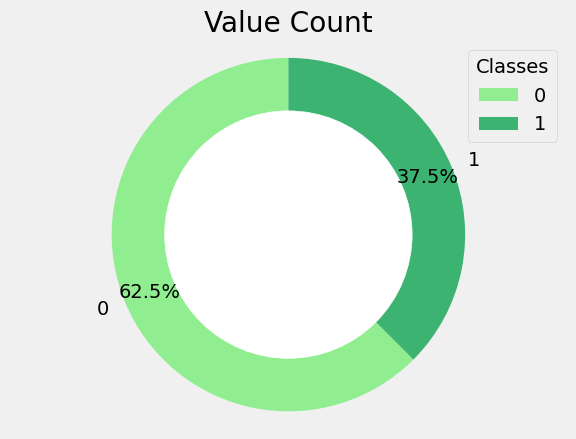

In [14]:
# Assuming you have a DataFrame called 'df' with a 'class' column
value_counts = df['class'].value_counts()
categories = value_counts.index
counts = value_counts.values

# Create a pie chart with green colors
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'green', 'forestgreen']
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)

# Draw a circle in the center to create a donut chart
inner_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(inner_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Value Count')

# Add a legend
plt.legend(categories, title='Classes', loc='best')

# Show the donut chart
plt.show()


**To visualize the distribution of the data. The scatter plots in a sns.pairplot can be used to visualize the distribution of the data for each variable. This can be helpful for identifying outliers and understanding the shape of the distribution.**

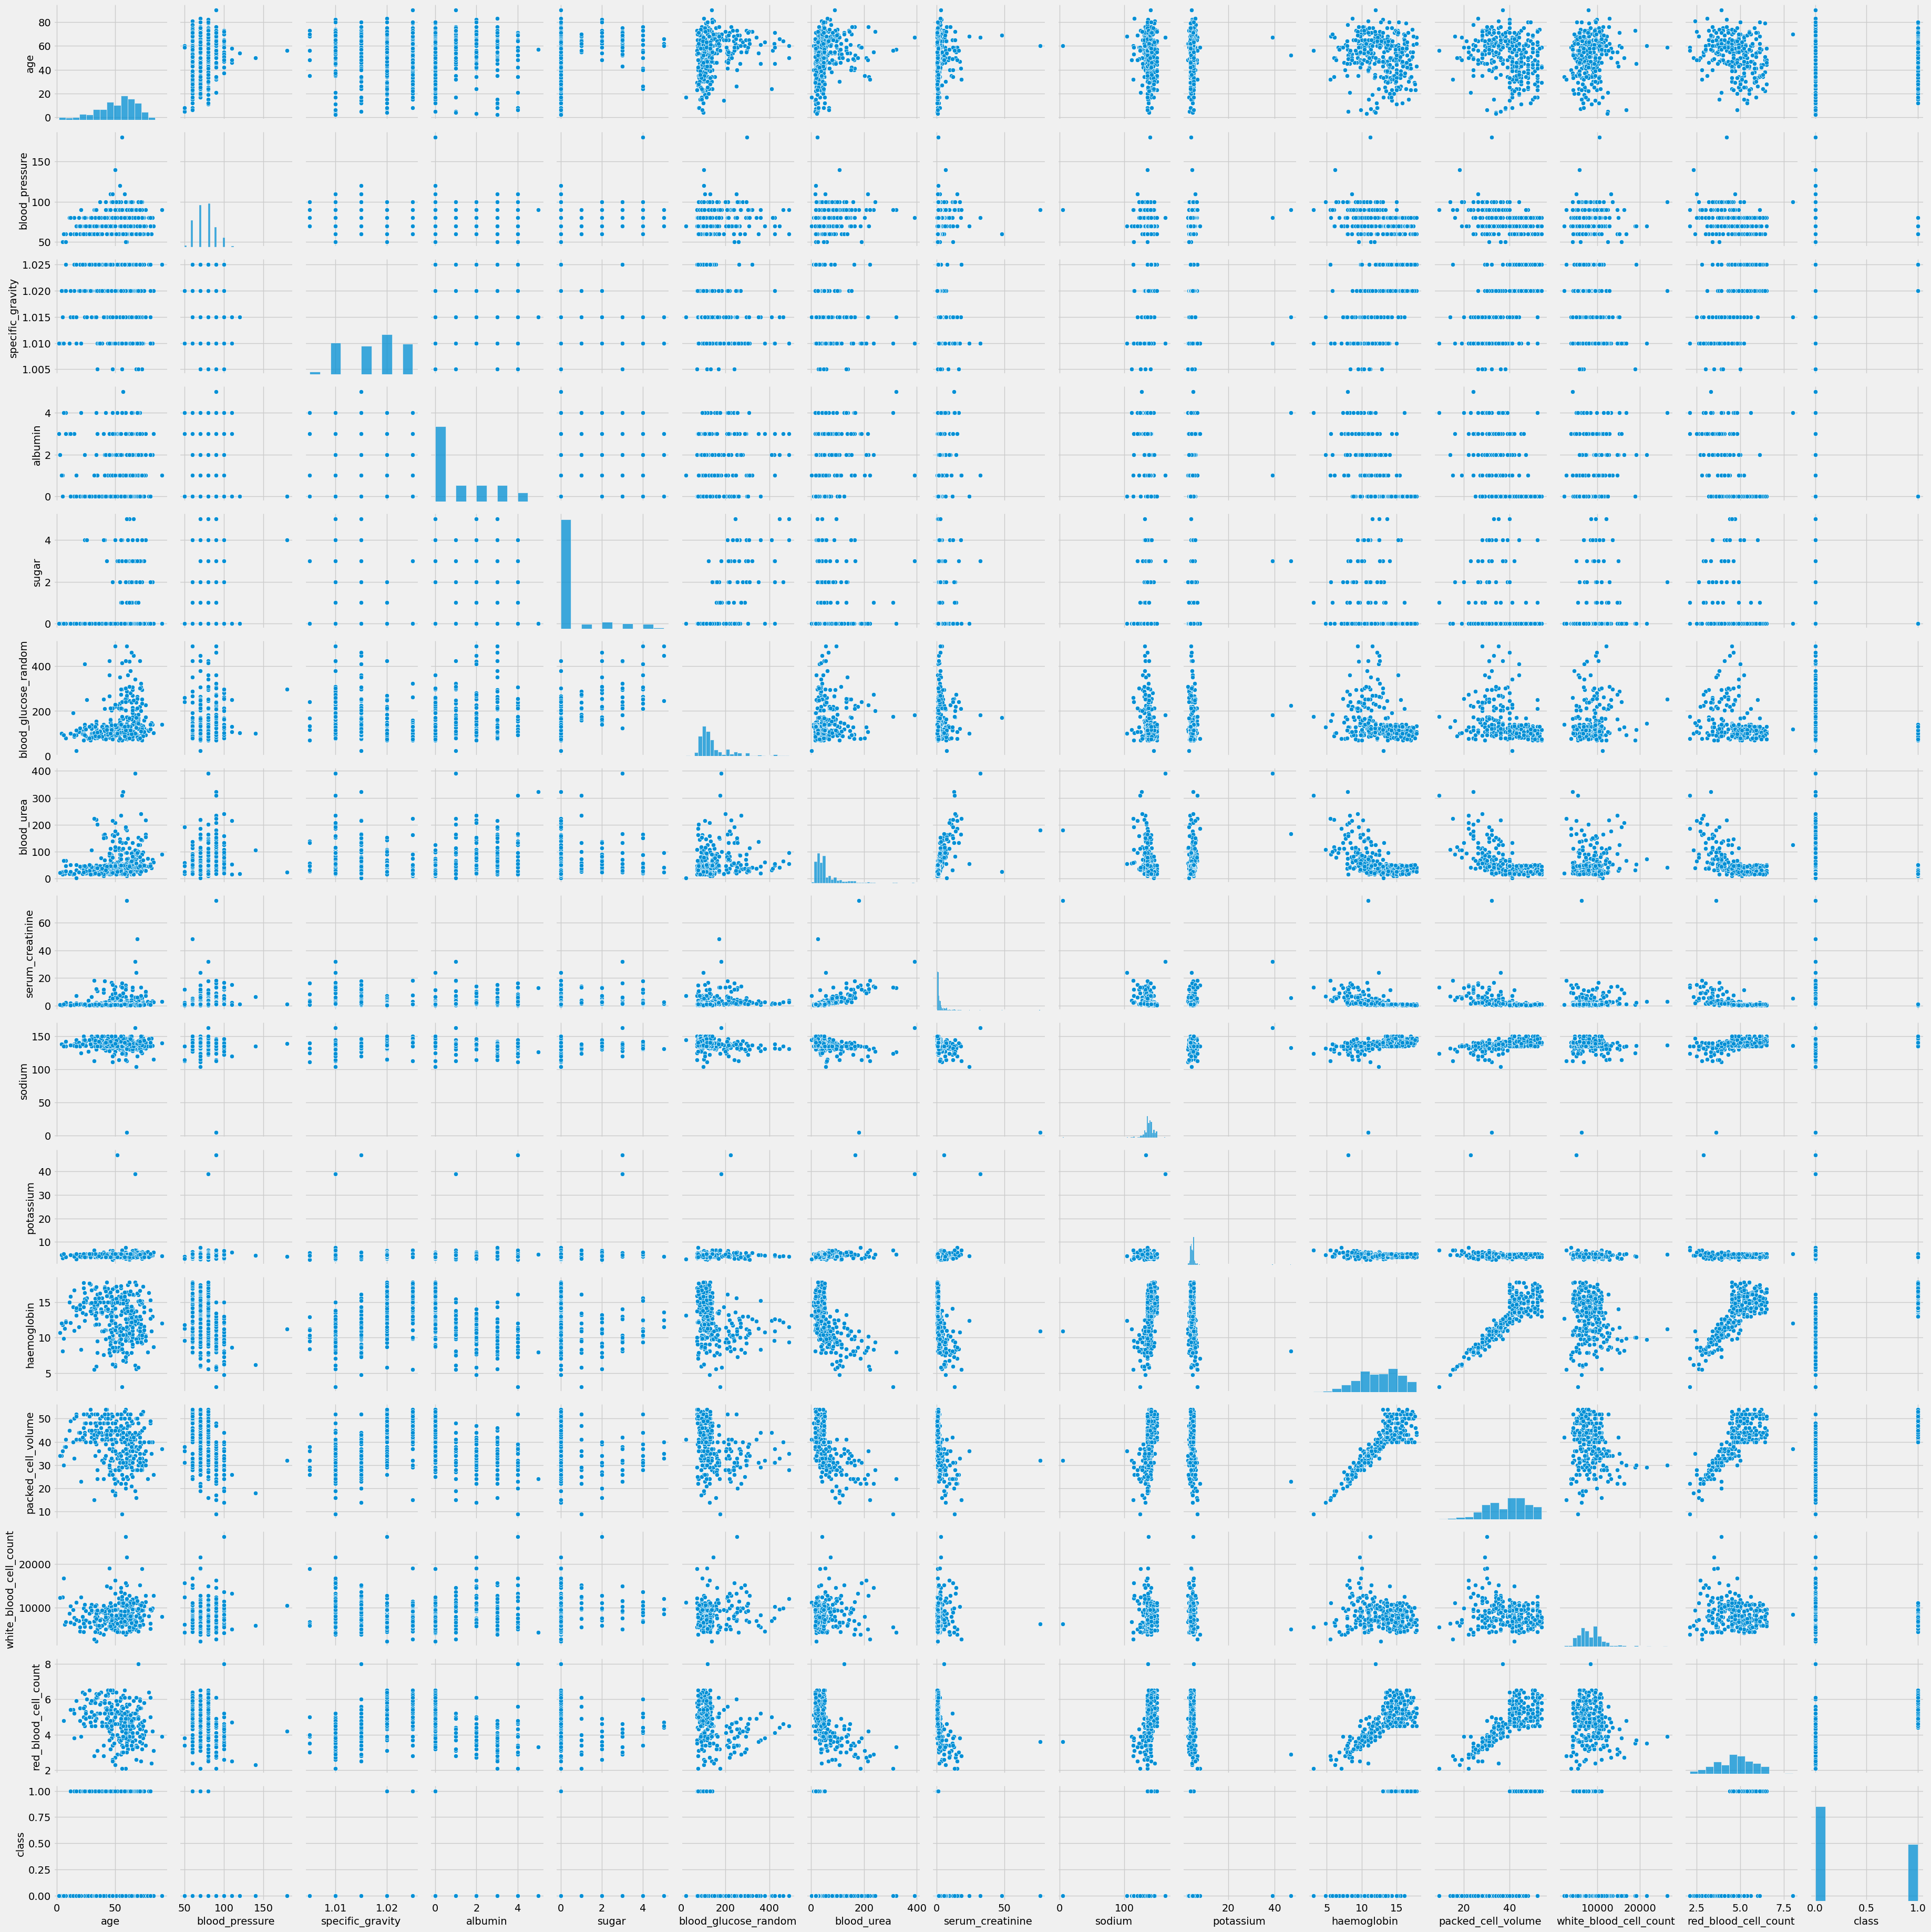

In [15]:
sns.pairplot(df)

**We plot sns.distplot for numerical values to visualize the distribution of the data. This can be helpful for understanding the shape of the distribution, the central tendency of the data, and the spread of the data.**

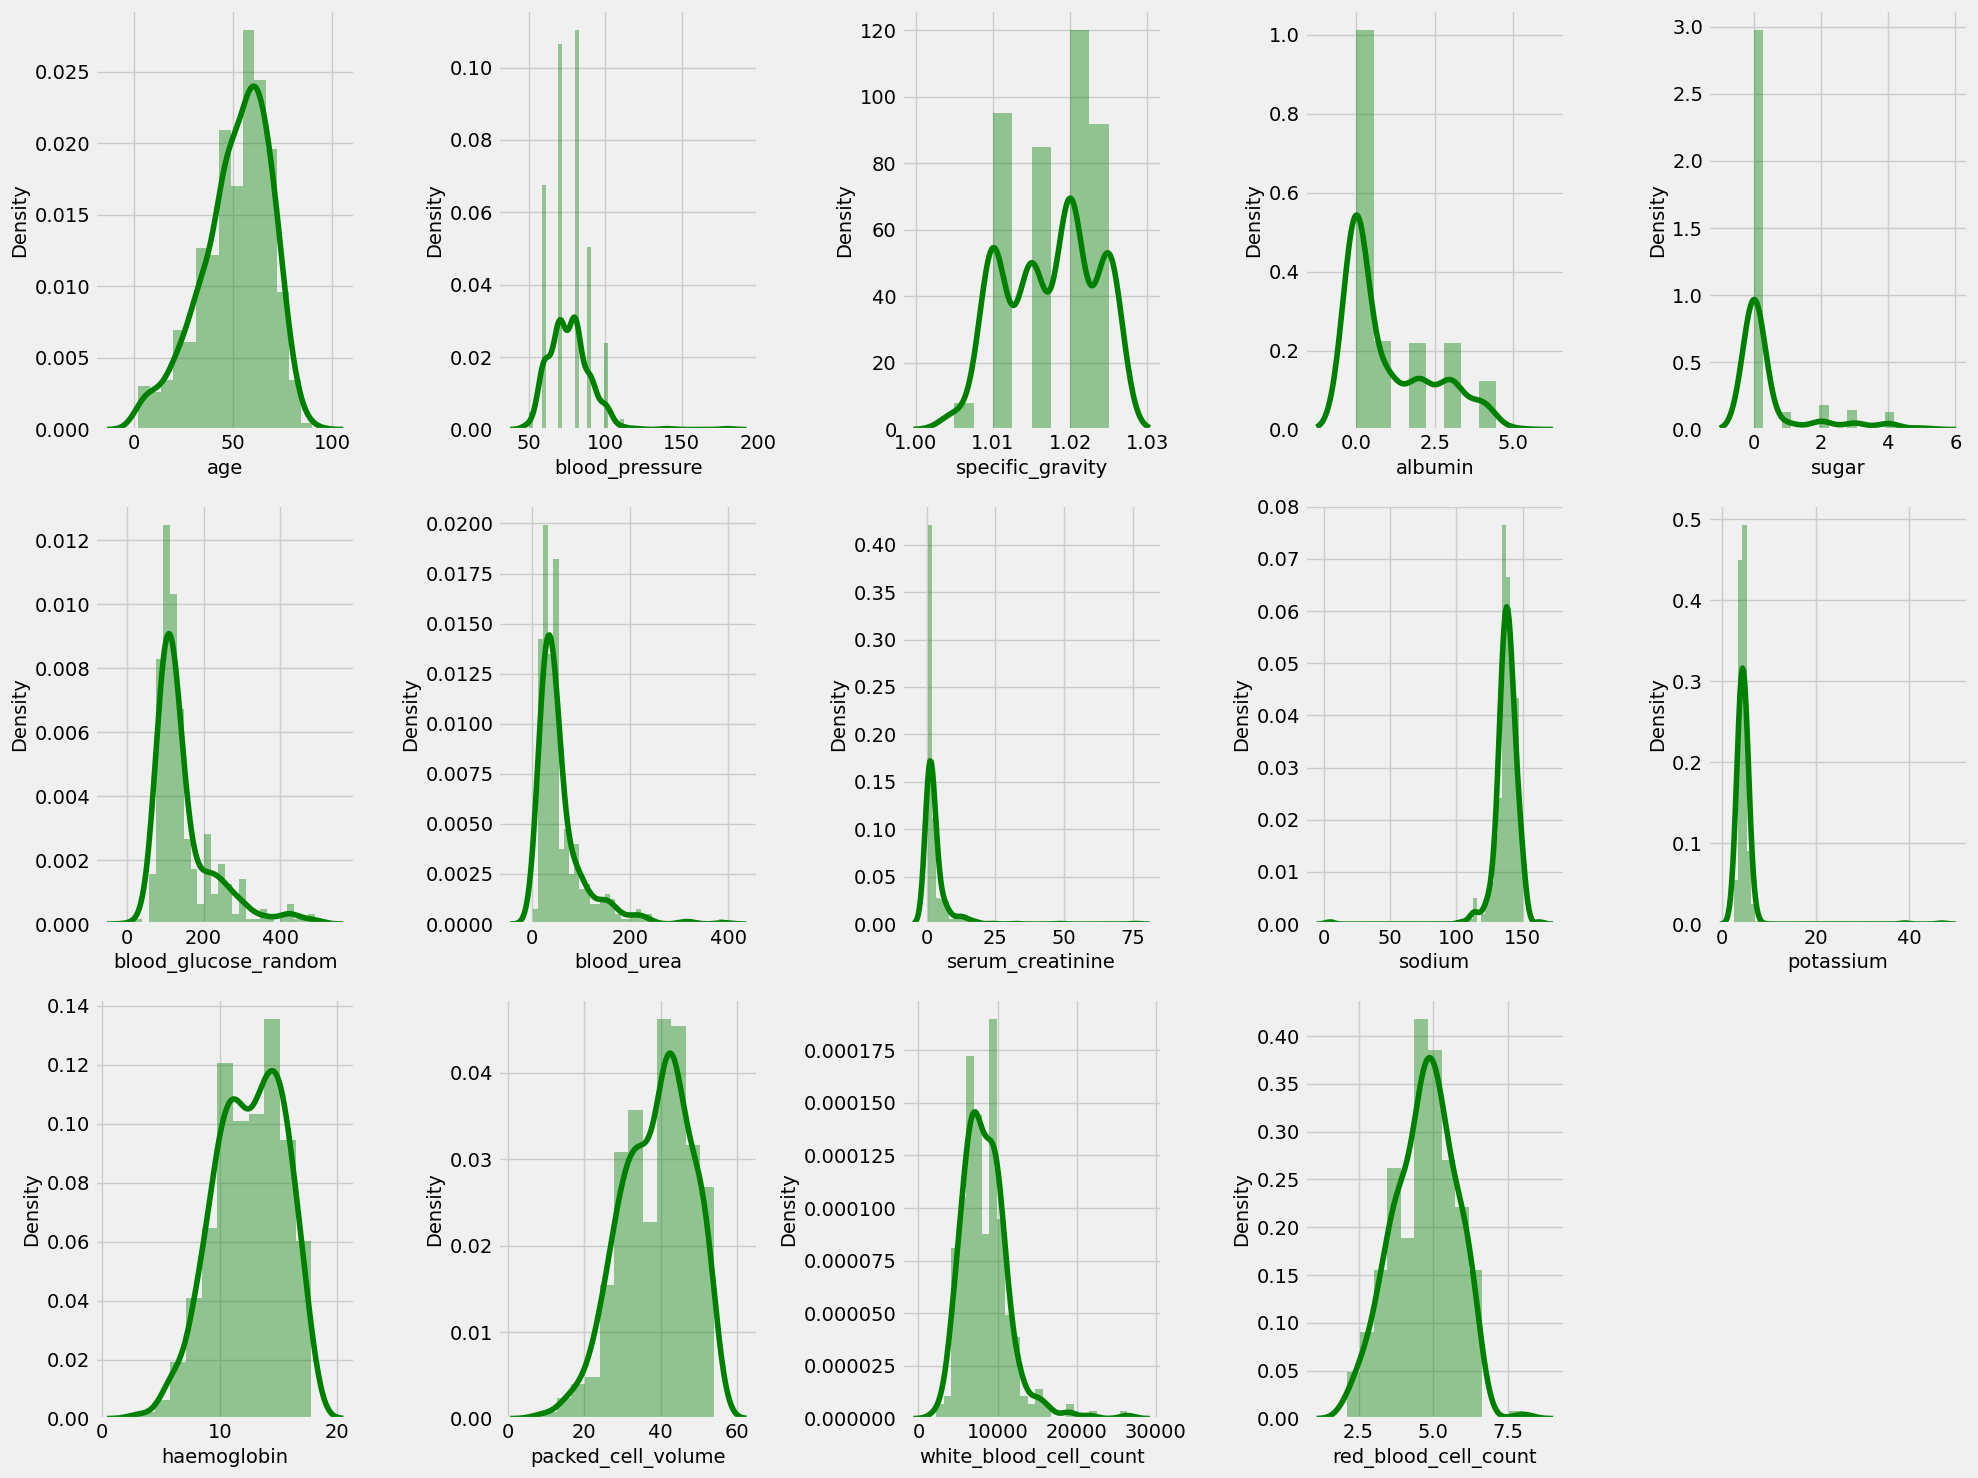

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**We use sns.countplot for categorical data to visualize the counts of each category. This can be helpful for understanding the distribution of the data, identifying the most common categories, and comparing the distributions of different categories.**

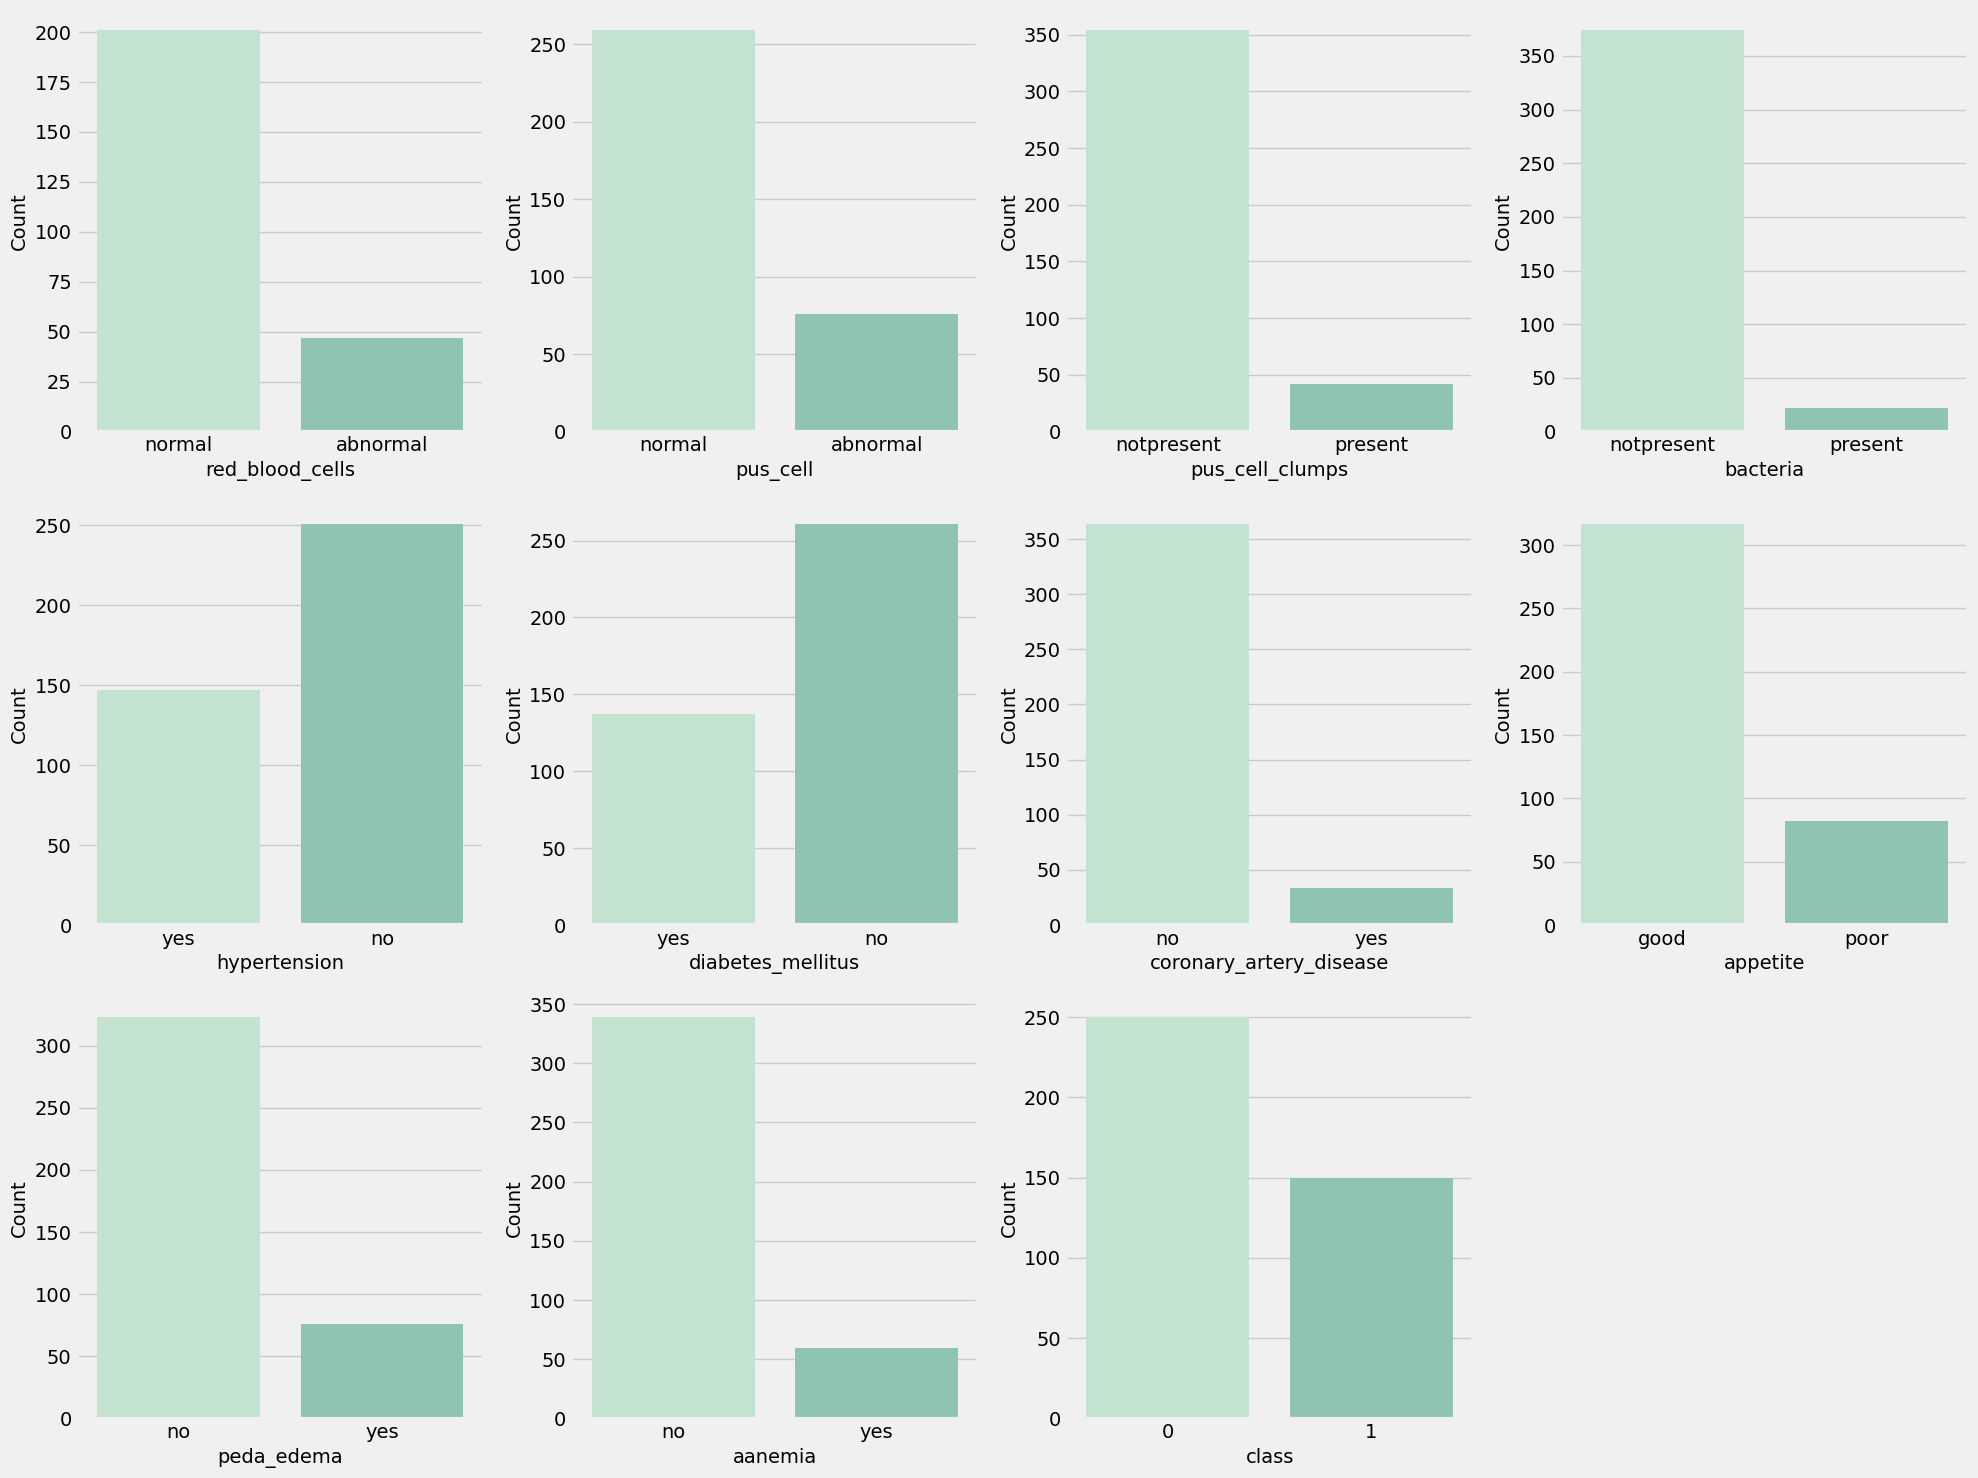

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_col:
    if plotnumber <= 13:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column,palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
        plt.xlabel(column)
        plt.ylabel('Count')
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [18]:
def kde(col):
    # Create a FacetGrid with custom settings
    custom_palette = ["red", "green"]
    grid = sns.FacetGrid(df, hue="class", height=6, aspect=2, palette=custom_palette)
    
    # Plot the KDE plot for the specified column
    grid.map(sns.kdeplot, col, linewidth=2, shade=True)
    
    # Add labels and a title
    grid.set_axis_labels(x_var=col, y_var="Density")
    plt.title(f"Kernel Density Estimate for {col}")
    
    # Add a legend
    grid.add_legend()
    
    # Show the plot
    plt.show()


**The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L) For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L) A person with only one kidney may have a normal level of about 1.8 or 1.9. High creatinine levels that reach 2.0 or more in babies and 5.0 or more in adults may indicate severe kidney impairment.**

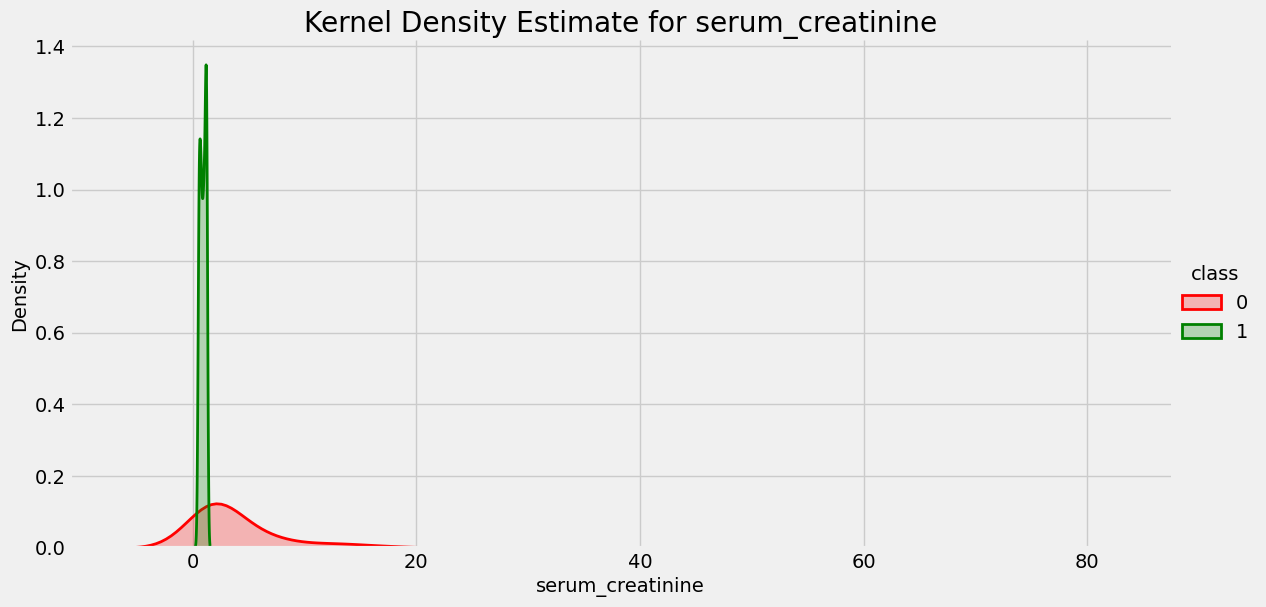

In [19]:
kde('serum_creatinine')

**Ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be below 90/60mmHg. As a result, blood pressure increases. If you have CKD, high blood pressure makes it more likely that your kidney disease will get worse and you will have heart problems.**

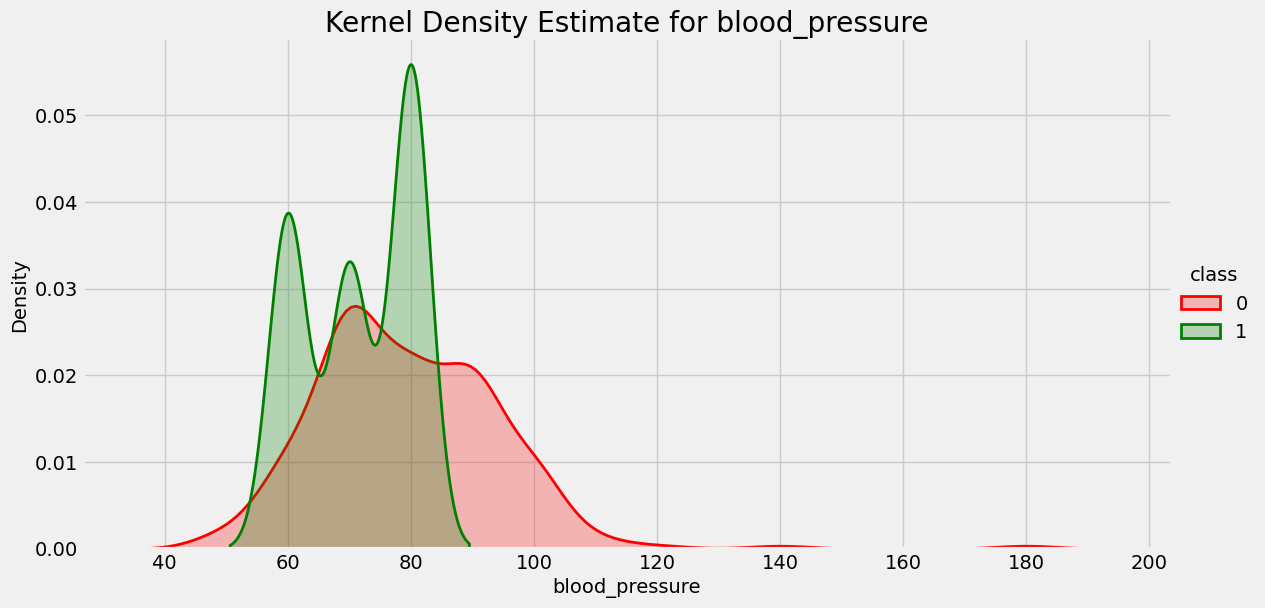

In [20]:
kde('blood_pressure')

**The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L). 
The number of white blood cells in the urine can increase if there is a kidney infection.**

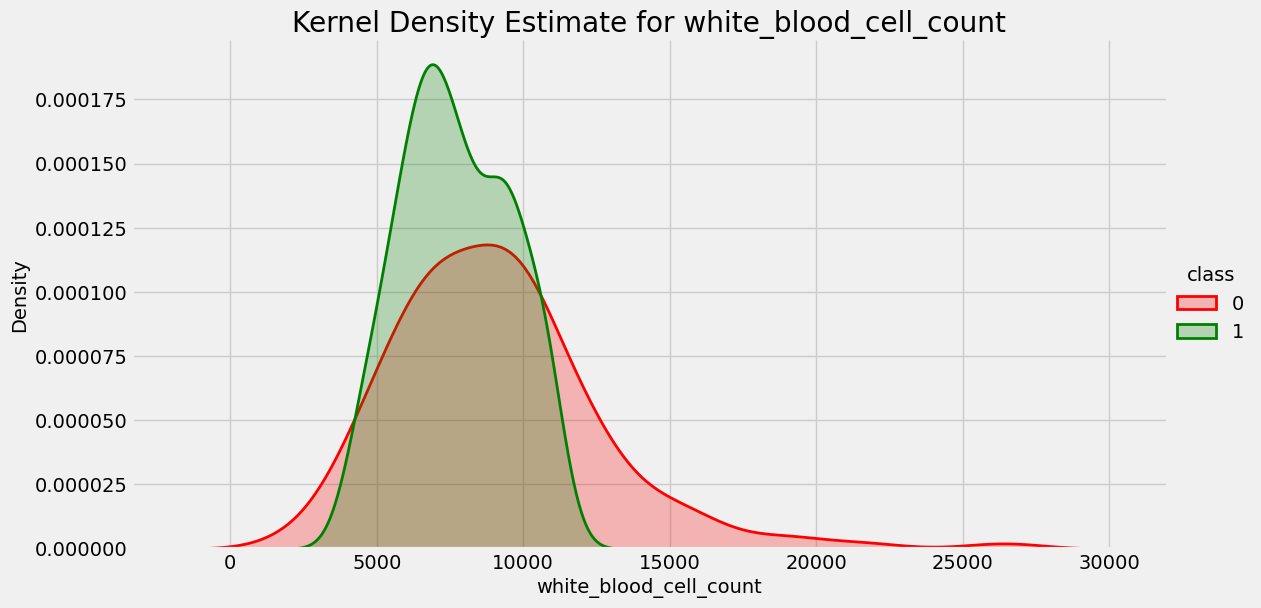

In [21]:
kde('white_blood_cell_count')

**For adults, the usual range is generally 4.35 to 5.65 million red blood cells per microliter (mcL) of blood for men and 3.92 to 5.13 million red blood cells per mcL of blood for women. A low RBC count could also indicate a vitamin B6, B12 or folate deficiency. It may also signify internal bleeding, kidney disease or malnutrition**

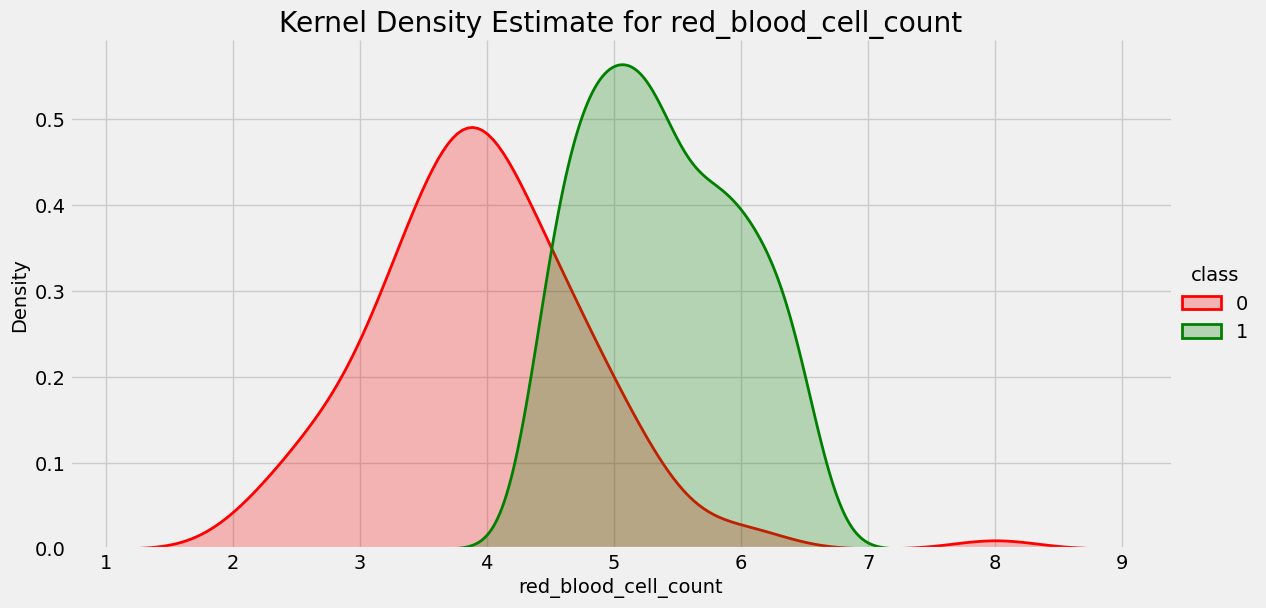

In [22]:
kde('red_blood_cell_count')

**The normal Hb level for males is 14 to 18 g/dl; that for females is 12 to 16 g/dl. When your kidneys are damaged, they produce less erythropoietin (EPO), a hormone that signals your bone marrow—the spongy tissue inside most of your bones—to make red blood cells.**

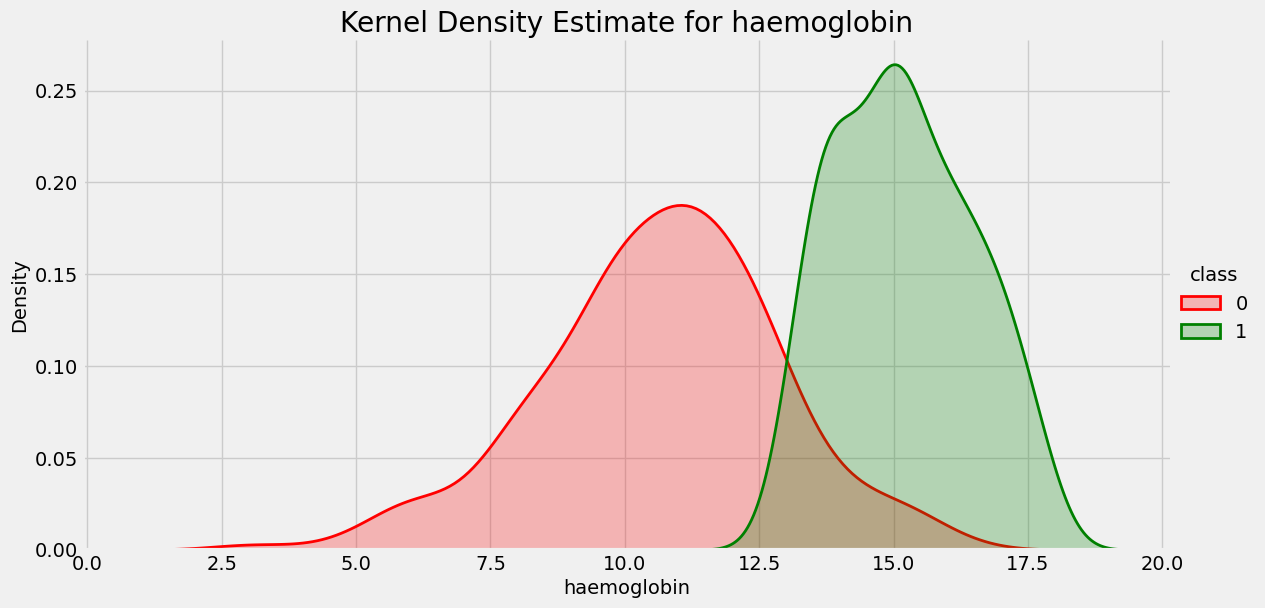

In [23]:
kde('haemoglobin')

**A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).When the kidneys are not functioning normally, which can be seen in chronic kidney disease or even temporary dehydration, the body holds too much water. And the proportion of sodium compared to water in the body lowers the sodium level.**

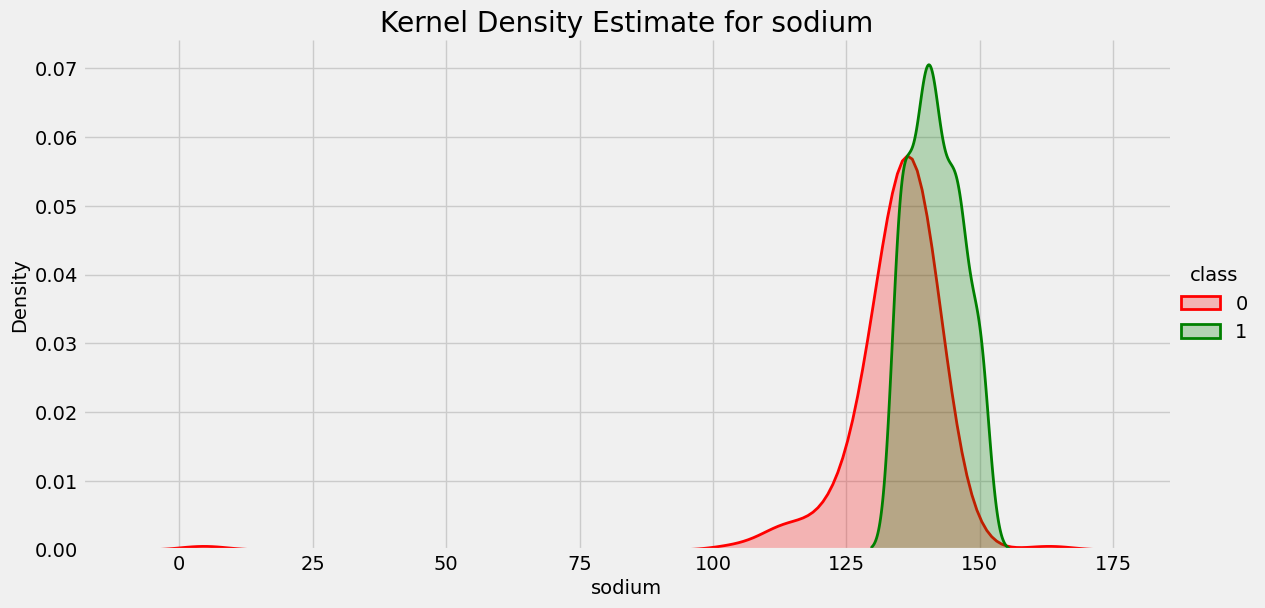

In [24]:
kde('sodium')

**The normal range of urea nitrogen in blood or serum is 5 to 20 mg/dl, or 1.8 to 7.1 mmol urea per liter. 
A high urea value can mean kidney injury or disease is present. Kidney damage can be caused by diabetes or high blood pressure that directly affects the kidneys. High urea levels can also be caused by low blood flow to the kidneys caused by dehydration or heart failure.**

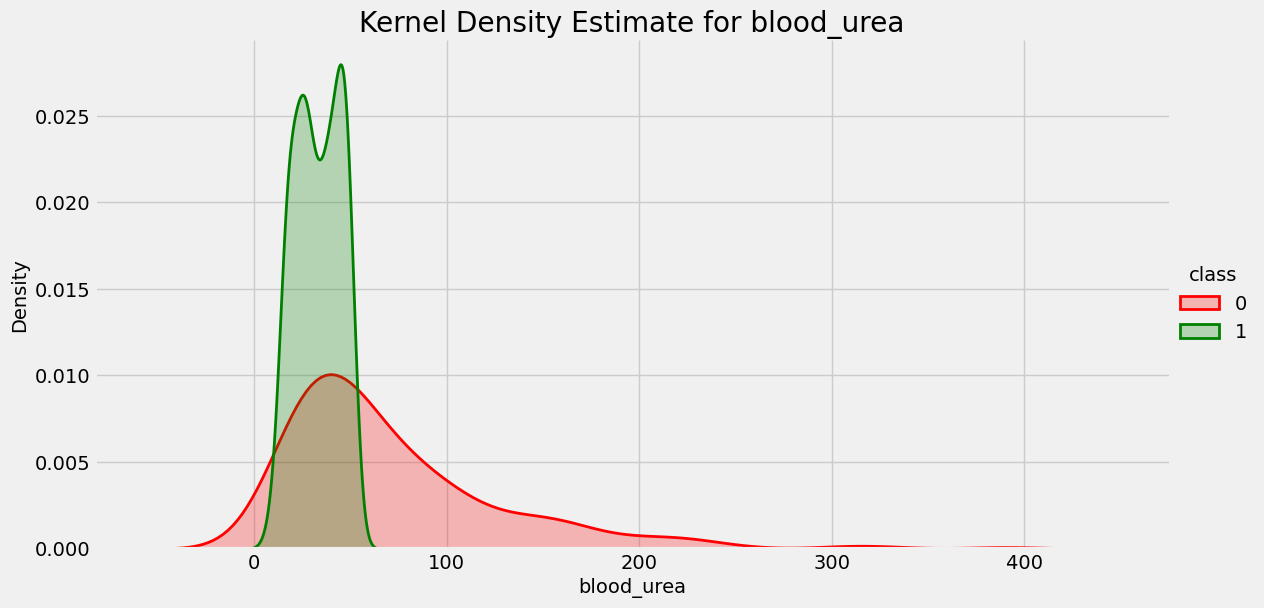

In [25]:
kde('blood_urea')

In [26]:
df_0=df[df['class']==0]#group by class 0
df_1=df[df['class']==1]#group by class 1

In [27]:
def pie_chart(col,df):
    # Count the occurrences of each category in the specified column
    category_counts = df[col].value_counts()
    colors = ['skyblue', 'lightgreen', 'lightpink']
    # Create a pie chart
    plt.figure(figsize=(6, 4))  # Optional: Set the figure size
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Add a title
    plt.title(f'Pie Chart for {col}')
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Show the pie chart
    plt.show()

**Observations from the Charts: A Correlation Between Kidney Disease and Bacterial Infection"
These headings emphasize the key observation that individuals with kidney disease might also have a higher likelihood of bacterial infections, while those without kidney disease do not exhibit a similar pattern.**

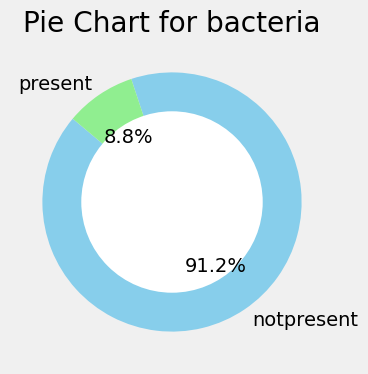

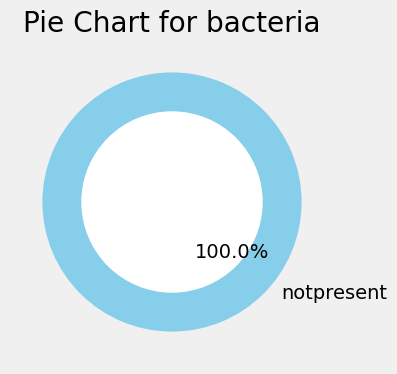

In [28]:
pie_chart('bacteria',df_0)
pie_chart('bacteria',df_1)

**Observations from the Charts: A Correlation Between Kidney Disease and Aanemia" These headings emphasize the key observation that individuals with kidney disease might also have a higher likelihood of Aanemia, while those without kidney disease do not exhibit a similar pattern.**

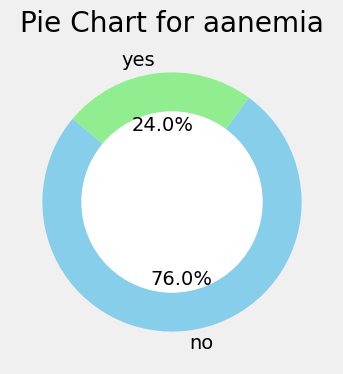

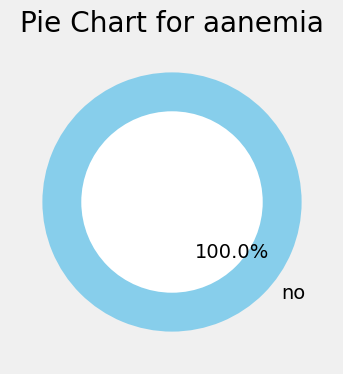

In [29]:
pie_chart('aanemia',df_0)
pie_chart('aanemia',df_1)

**Observations from the Charts: A Correlation Between Kidney Disease and Diabetes Mellitus" These headings emphasize the key observation that individuals with kidney disease might also have a higher likelihood of Diabetes Mellitus, while those without kidney disease do not exhibit a similar pattern.**

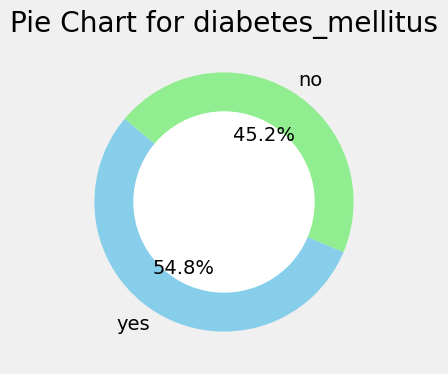

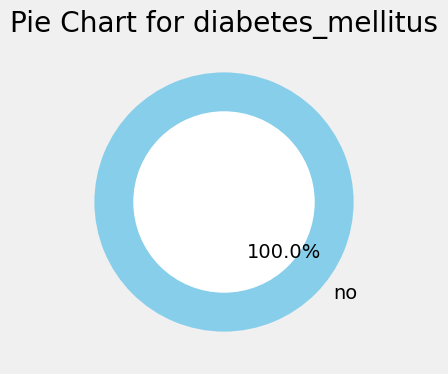

In [30]:
pie_chart('diabetes_mellitus',df_0)
pie_chart('diabetes_mellitus',df_1)

**Observations from the Charts: A Correlation Between Kidney Disease and Appetite" These headings emphasize the key observation that individuals with kidney disease might also have a higher likelihood of Appetite, while those without kidney disease do not exhibit a similar pattern.**

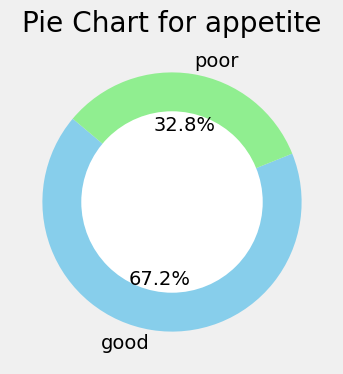

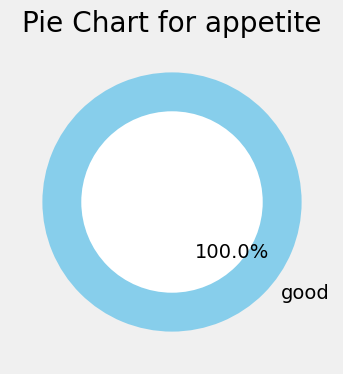

In [31]:
pie_chart('appetite',df_0)
pie_chart('appetite',df_1)

**Kidney disease can affect anyone at any age. Babies can be born with kidneys that haven't developed normally or don't function normally. Genetic alterations can result in kidney diseases developing during childhood or later in life. Other types of kidney disease can develop at any age.**

[Text(15.450000000000005, 0.5, 'AGE')]

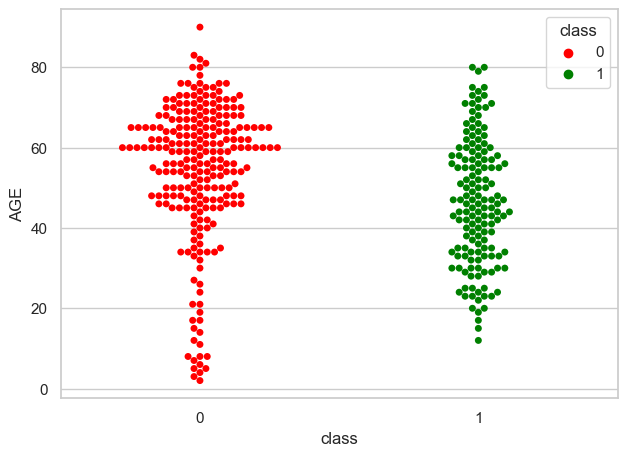

In [32]:
sns.set_theme(style="whitegrid", palette=["red", "green"])

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="class", y="age",hue='class')
ax.set(ylabel="AGE")

# ***Data Pre Processing***

In [33]:
#null values
df[num_col].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [34]:
#function to fill the null value in numerical columns
def fillna_num(column):
    imputer = SimpleImputer(strategy='mean')
    df[column] = imputer.fit_transform(df[[column]])
#filling the null values
for col in num_col:
    fillna_num(col)

In [35]:
df[num_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [36]:
#storing the columns name of categorical value
cat_col=[col for col in df.columns if df[col].dtype==object]

In [37]:
df[cat_col].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [38]:
# Replace missing values in a specific feature with its mode
for col in cat_col:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [39]:
df[cat_col].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [40]:
#label encoding for categorcal values
le = LabelEncoder()

for col in cat_col:
    df[col] = le.fit_transform(df[col])

**Final dataset**

In [41]:
df.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [42]:
X=df.drop(['class'],axis=1)#features columns 
y=df['class']#target column

In [43]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [44]:
X_train.shape,X_test.shape

((280, 24), (120, 24))

# ***Training Model***

In [45]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    
    # Generate a classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(f'{model_name} Confusion Matrix:')
    print(cm)
    
    print('-' * 55)

Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Random Forest Confusion Matrix:
[[72  0]
 [ 0 48]]
-------------------------------------------------------
Logistic Regression Accuracy: 0.94
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.94      0.92      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Logistic Regression Confusion Matrix:
[[69  3]
 [ 4 44]]
--------------------------------------

**As from the above trained model you can see the socre -:**
* Random Forest Accuracy: 1.0
* Logistic Regression Accuracy: 0.94
* K-Nearest Neighbors Accuracy: 0.72
* MultinomialNB Accuracy: 0.86
* Decision Tree Accuracy: 0.94
* AdaBoost Accuracy: 1.00

**Selecting the final model for your machine learning project should not be based solely on accuracy. It's essential to consider various factors, including the specific characteristics of your dataset, the problem you're solving, and the goals of your project. While accuracy is an important metric, it's not the only one to consider. 
Why we choose multinomial model as final model because it perfoms better than other model which are bias
Multinomial Naive Bayes (MultinomialNB) is a suitable choice for data that combines both numerical and categorical features due to its flexibility in handling discrete data. This algorithm is particularly well-suited for text classification tasks, where the input data often includes numerical features such as word counts and categorical features such as word presence or absence. MultinomialNB leverages the probability distribution of feature occurrences, making it capable of modeling and making predictions based on both types of features effectively. Its simplicity, efficient computation, and ability to handle mixed data types make it a valuable choice for tasks where numerical and categorical data coexist, provided that the Naive Bayes assumption of feature independence roughly holds, or preprocessing steps are taken to address any violations of this assumption.**

# ***Optimizing Model Performance: Hyperparameter Tuning***

In [46]:
# Initializing MultinomialNB with custom parameters
nb=MultinomialNB(alpha=0.1,
    force_alpha='warn',
    fit_prior=True,
    class_prior=[0.6, 0.4])
# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Get the model's score

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        72
           1       0.79      0.94      0.86        48

    accuracy                           0.88       120
   macro avg       0.87      0.89      0.87       120
weighted avg       0.89      0.88      0.88       120

Confusion Matrix:
[[60 12]
 [ 3 45]]


# ***Model Performance***

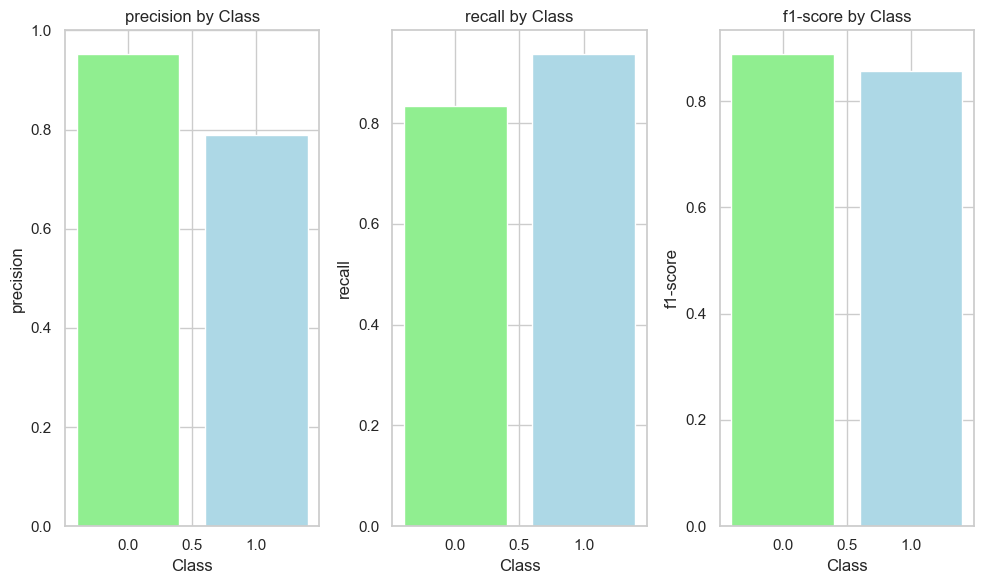

In [47]:
# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T  # Convert the classification report to a DataFrame

# Plot precision, recall, and F1-score for each class
classes = [0, 1]
metrics = ['precision', 'recall', 'f1-score']

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(classes, report_df[metric][classes], color=['lightgreen', 'lightblue'])
    plt.xlabel('Class')
    plt.ylabel(metric)
    plt.title(f'{metric} by Class')

plt.tight_layout()
plt.show()

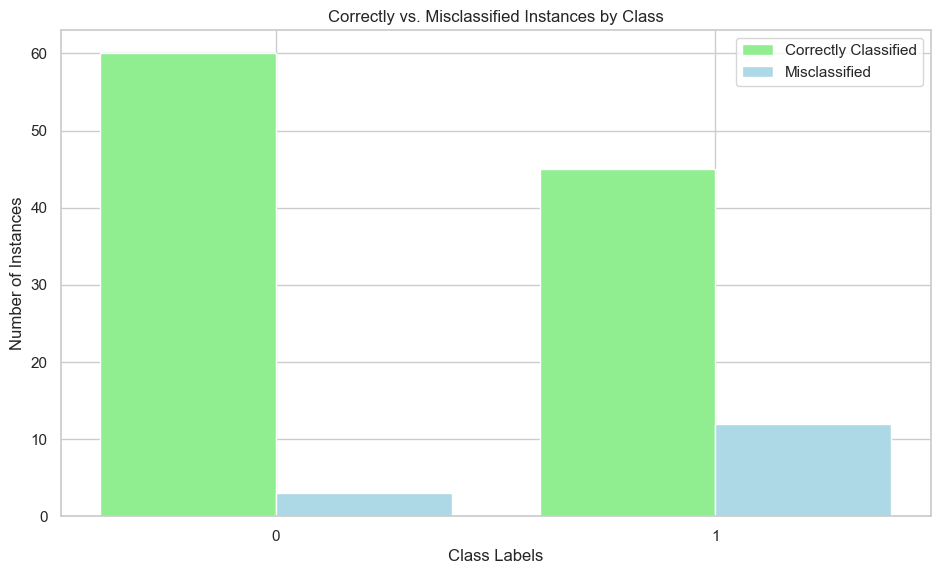

In [48]:
# Define the class labels
class_labels = np.unique(y_test)

# Calculate the number of correctly and incorrectly classified instances for each class
correctly_classified = np.diag(cm)
misclassified = np.sum(cm, axis=0) - correctly_classified

# Create a bar chart with lightgreen and lightblue colors
plt.figure(figsize=(10, 6))
plt.bar(class_labels - 0.2, correctly_classified, width=0.4, label='Correctly Classified', color='lightgreen')
plt.bar(class_labels + 0.2, misclassified, width=0.4, label='Misclassified', color='lightblue')

# Add labels and legend
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(class_labels)
plt.title('Correctly vs. Misclassified Instances by Class')
plt.legend()

# Display the chart
plt.show()


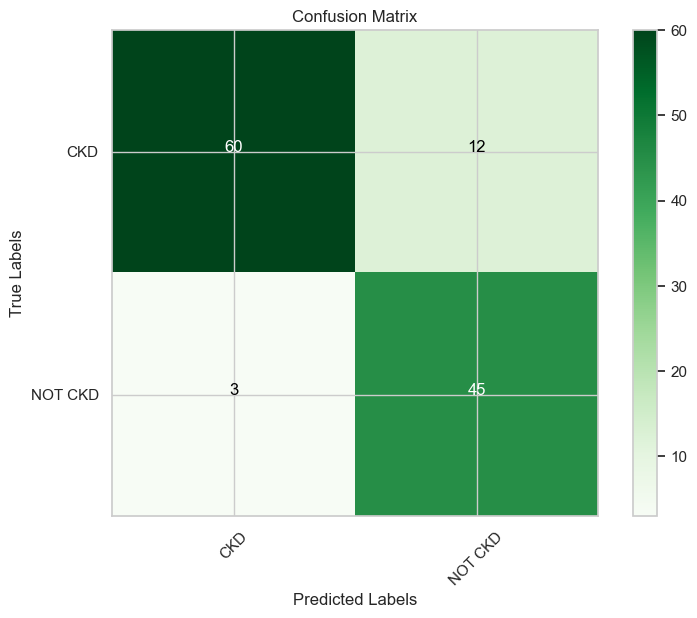

In [49]:
# Create a graph to visualize the results with green and white colors
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)  # Change the colormap to Greens
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['CKD', 'NOT CKD']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
for i in range(len(classes)):
    for j in range(len(classes)):
        text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color=text_color)
plt.show()


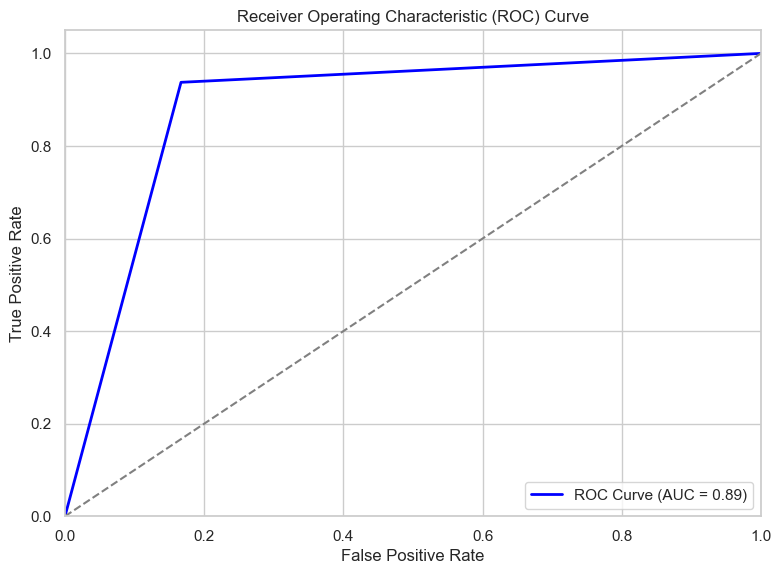

In [50]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


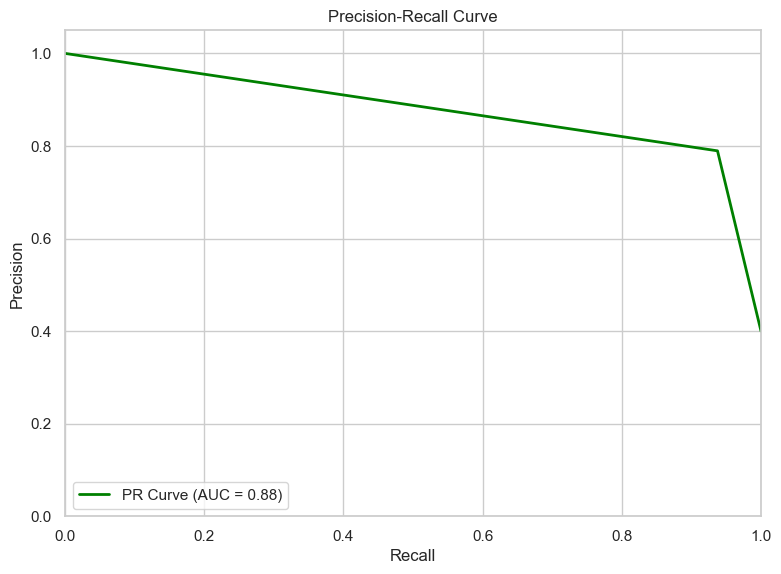

In [51]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate area under the curve (AUC) for precision-recall
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# ***Saving Model***

In [54]:
# Save the model to a file
filename = 'model.pkl'
joblib.dump(nb, filename)

# Later, you can load the model using joblib.load
loaded_model = joblib.load(filename)

# ***Testing model***

In [53]:
test=X[:1].values
pred=loaded_model.predict(test)#loading the saved model
true_labels = y_test[:1]
accuracy = accuracy_score(true_labels, pred)
if pred[0]==0:
    print('Person is suffering from Kidney Disease')
else:
    print('Person is not suffering from Kidney Disease')
print(f'Model Accuracy: {accuracy:.2f}')
print('The values we enter for prediction')
X[:1]

Person is suffering from Kidney Disease
Model Accuracy: 1.00
The values we enter for prediction


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.0,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
